In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import datasets

In [2]:
df_diabetes=datasets.load_diabetes()
dir(df_diabetes)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [3]:
df_input=pd.DataFrame(df_diabetes.data,columns=df_diabetes.feature_names)
df_target=pd.DataFrame(df_diabetes.target,columns=["DiseaseProgression"])

In [4]:
print(pd.concat([df_input,df_target],axis=1).isnull().sum())

age                   0
sex                   0
bmi                   0
bp                    0
s1                    0
s2                    0
s3                    0
s4                    0
s5                    0
s6                    0
DiseaseProgression    0
dtype: int64


In [5]:
pd.concat([df_input,df_target],axis=1).corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


<AxesSubplot:>

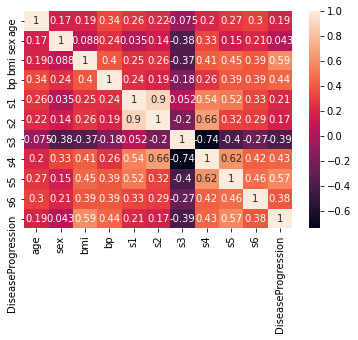

In [6]:
sns.heatmap(pd.concat([df_input,df_target],axis=1).corr(),annot=True)

In [7]:
pd.concat([df_input,df_target],axis=1).describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [8]:
from scipy.stats import zscore
df_combined=pd.concat([df_input,df_target],axis=1)
z_scr=zscore(df_combined)
df_combined_new=df_combined.loc[(abs(z_scr)<3).all(axis=1)]
df_combined_new.shape

(430, 11)

In [9]:
df_combined_new

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
436,-0.056370,-0.044642,-0.074108,-0.050428,-0.024960,-0.047034,0.092820,-0.076395,-0.061177,-0.046641,48.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0


In [10]:
df_x=df_combined_new.drop(['DiseaseProgression'],axis=1)
y=df_combined_new[['DiseaseProgression']]

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def max_r2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            final_r_state=r2_scr
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [12]:
from sklearn.linear_model import LinearRegression
ireg=LinearRegression()
max_r2_score(ireg,df_x,y)

r2 score corresponding to  40  is  0.28874655082391587
r2 score corresponding to  41  is  0.5072891845970691
r2 score corresponding to  42  is  0.36666965895447035
r2 score corresponding to  43  is  0.5414633719716158
r2 score corresponding to  44  is  0.5028302023948112
r2 score corresponding to  45  is  0.41940208977825466
r2 score corresponding to  46  is  0.49944594921344987
r2 score corresponding to  47  is  0.5696168464053883
r2 score corresponding to  48  is  0.48941614789926113
r2 score corresponding to  49  is  0.4157614115642506
r2 score corresponding to  50  is  0.5113404267738515
r2 score corresponding to  51  is  0.25353904234282654
r2 score corresponding to  52  is  0.6129709896007238
r2 score corresponding to  53  is  0.41643342507750947
r2 score corresponding to  54  is  0.5374683464284009
r2 score corresponding to  55  is  0.48857235252489806
r2 score corresponding to  56  is  0.3139475454679299
r2 score corresponding to  57  is  0.3987795821170861
r2 score correspondi

0.6269516531714291

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
neighbors={'n_neighbors':range(1,30)}
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(df_x,y)
gknr.best_params_

{'n_neighbors': 19}

In [14]:
knr=KNeighborsRegressor(n_neighbors=19)
max_r2_score(knr,df_x,y)

r2 score corresponding to  40  is  0.24286851827327405
r2 score corresponding to  41  is  0.4609664822925045
r2 score corresponding to  42  is  0.3754639421781797
r2 score corresponding to  43  is  0.4850176749925311
r2 score corresponding to  44  is  0.5070124907462026
r2 score corresponding to  45  is  0.34696634001528726
r2 score corresponding to  46  is  0.451542905441379
r2 score corresponding to  47  is  0.4895196971602195
r2 score corresponding to  48  is  0.4958809239179024
r2 score corresponding to  49  is  0.42630690730410414
r2 score corresponding to  50  is  0.45313119612132746
r2 score corresponding to  51  is  0.2678001378172621
r2 score corresponding to  52  is  0.5358847489904657
r2 score corresponding to  53  is  0.4586727843601762
r2 score corresponding to  54  is  0.46474045120456287
r2 score corresponding to  55  is  0.41518128514327657
r2 score corresponding to  56  is  0.33146594793420947
r2 score corresponding to  57  is  0.41031633084078845
r2 score correspondin

0.5372893665697835

In [15]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(ireg,df_x,y,cv=5).mean())
print(cross_val_score(ireg,df_x,y).std())

0.4676911221693185
0.05595217785841943


In [16]:
print(cross_val_score(knr,df_x,y,cv=5).mean())
print(cross_val_score(knr,df_x,y).std())

0.4447393304649888
0.06885364198445655


In [17]:
from sklearn.linear_model import Lasso,Ridge
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(df_x,y)
clf.best_params_

{'alpha': 0.1}

In [18]:
lsreg=Lasso(alpha=0.1)
max_r2_score(lsreg,df_x,y)

r2 score corresponding to  40  is  0.2986711407333048
r2 score corresponding to  41  is  0.4843754303817134
r2 score corresponding to  42  is  0.395596141334038
r2 score corresponding to  43  is  0.5279704191720399
r2 score corresponding to  44  is  0.50503294565865
r2 score corresponding to  45  is  0.4036196797761409
r2 score corresponding to  46  is  0.5035821455123144
r2 score corresponding to  47  is  0.5557723339863485
r2 score corresponding to  48  is  0.4951902457271491
r2 score corresponding to  49  is  0.41898867700436127
r2 score corresponding to  50  is  0.4841336844871693
r2 score corresponding to  51  is  0.2705971586987356
r2 score corresponding to  52  is  0.5965279705889219
r2 score corresponding to  53  is  0.4227011451196119
r2 score corresponding to  54  is  0.5148970393210152
r2 score corresponding to  55  is  0.4921979652112449
r2 score corresponding to  56  is  0.3249514143291744
r2 score corresponding to  57  is  0.41824855781541936
r2 score corresponding to  58

0.5997275247178084

In [19]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#ada_reg=AdaBoostRegressor()
#parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[ireg,lsreg,DecisionTreeRegressor()]}
#clf = GridSearchCV(ada_reg, parameters, cv=5)
#clf.fit(df_x,y)
#clf.best_params_

In [21]:
#r_state=max_r2_score(ada_reg,df_x,y)

NameError: name 'ada_reg' is not defined

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 99,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [23]:
#Lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  48.95593018443329
r2_score is:  0.6269516531714291


In [29]:
import pickle
  
# Save the model as a pickle in a file 
pickle.dump(lreg, open('diabetes_prog_lreg.pkl','wb'))